**IMPLEMENTATION OF SOFTMAX REGRESSION**

Implementing softmax function:

In [106]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a 2D array.

    Parameters:
    z (numpy.ndarray): Input array of shape (m, n) (m = samples, n = classes).

    Returns:
    numpy.ndarray: Probabilities of shape (m, n), where each row sums to 1.

    Note: Subtracts max value in each row to improve numerical stability.
    """
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [108]:
def test_softmax():
    """
    Test the softmax function with various cases:
    - Output probabilities sum to 1.
    - Probabilities are non-negative.
    - Handles edge cases like zeros, large/small values, and mixed inputs.
    """
    test_cases = [
        (np.array([[0, 0, 0]]), "All zeros"),
        (np.array([[1, 2, 3]]), "Simple case"),
        (np.array([[999, 999, 999]]), "Large identical values"),
        (np.array([[-999, -999, -999]]), "Small identical values"),
        (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]
    for i, (z, description) in enumerate(test_cases):
        print(f"Running Test {i + 1}: {description}")
        result = softmax(z)
        assert np.allclose(result.sum(axis=1), 1), f"Fail: Probabilities don't sum to 1 ({description})"
        assert np.all(result >= 0), f"Fail: Negative probabilities found ({description})"
        print(f"Test {i + 1} passed.")
    print("All tests passed.")

test_softmax()

Running Test 1: All zeros
Test 1 passed.
Running Test 2: Simple case
Test 2 passed.
Running Test 3: Large identical values
Test 3 passed.
Running Test 4: Small identical values
Test 4 passed.
Running Test 5: Mixed positive and negative
Test 5 passed.
All tests passed.


In [112]:
def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.
    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,).
    Returns:
    float: Cross-entropy loss for the observation.
    """
    return -np.sum(y_true * np.log(y_pred + 1e-10))

In [113]:
def test_loss_softmax():
    """
    Test the loss_softmax function with different cases:
    """
    # Perfect prediction
    y_true = np.array([0, 1, 0])  # True label (one-hot)
    y_pred = np.array([0.1, 0.8, 0.1])  # Predicted probabilities
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.8)), "Test Case 1 Failed"

    # Incorrect prediction
    y_true = np.array([1, 0, 0])  # True label (one-hot)
    y_pred = np.array([0.3, 0.4, 0.3])  # Predicted probabilities
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.3)), "Test Case 2 Failed"

    # Edge case: Near-zero probability
    y_true = np.array([0, 1, 0])  # True label (one-hot)
    y_pred = np.array([0.01, 0.98, 0.01])  # Predicted probabilities
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.98)), "Test Case 3 Failed"

    print("All test cases passed!")

# Run the test
test_loss_softmax()

All test cases passed!


Implementing loss function:

In [111]:
def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.
    Parameters:
    y_true (numpy.ndarray): One-hot encoded true labels (shape: (c,)).
    y_pred (numpy.ndarray): Predicted probabilities (shape: (c,)).
    Returns:
    float: Cross-entropy loss.
    """
    return -np.sum(y_true * np.log(y_pred + 1e-10))  # Prevent log(0) with small epsilon

In [114]:
def test_loss_softmax():
    """
    Test the loss_softmax function with different cases:
    - Perfect prediction
    - Incorrect prediction
    - Edge case with near-zero probability
    """
    # Test Case 1: Perfect prediction
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.8)), "Test 1 Failed"

    # Test Case 2: Incorrect prediction
    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.3, 0.4, 0.3])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.3)), "Test 2 Failed"

    # Test Case 3: Near-zero probability
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.01, 0.98, 0.01])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.98)), "Test 3 Failed"

    print("All tests passed!")

# Run the test
test_loss_softmax()

All tests passed!


Implementing cost function- avg of loss function:

In [60]:
def cost_softmax(X, y, W, b):
    """
    Compute the average cross-entropy cost over all samples.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    float: Average cross-entropy cost over all samples.
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [115]:
def test_cost_softmax():
    """
    Test cost_softmax with different cases:
    - Perfect predictions
    - Zero weights and bias
    """
    # Test Case 1: Small dataset with perfect predictions
    X = np.array([[1, 2], [2, 3], [3, 4]])
    y = np.array([[1, 0], [0, 1], [1, 0]])
    W = np.array([[1, -1], [-1, 1]])
    b = np.array([0, 0])
    y_pred = softmax(np.dot(X, W) + b)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test 1 Failed"

    # Test Case 2: Zero weights and bias
    X = np.array([[1, 0], [0, 1], [1, 1]])
    y = np.array([[1, 0], [0, 1], [1, 0]])
    W = np.zeros((2, 2))
    b = np.zeros(2)
    y_pred = softmax(np.dot(X, W) + b)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test 2 Failed"

    print("All tests passed!")

# Run the test
test_cost_softmax()

All tests passed!


Implementing gradient descent for softmax regression:

Gradient implementation for softmax:

In [116]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b

In [117]:
def test_compute_gradient_softmax():
    # Define inputs
    X = np.array([[1, 2], [3, 4]])  # Shape (2, 2)
    y = np.array([[1, 0], [0, 1]])  # Shape (2, 2), one-hot encoded
    W = np.array([[0.1, 0.2], [0.3, 0.4]])  # Shape (2, 2)
    b = np.array([0.01, 0.02])  # Shape (2,)

    # Compute expected gradients
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
    grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

    # Test gradients
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
    assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Grad W mismatch"
    assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Grad b mismatch"

    print("Tests passed.")

# Run test
test_compute_gradient_softmax()

Tests passed.


Gradient descent for softmax:

In [64]:
# Gradient Descent
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.
    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return W, b, cost_history

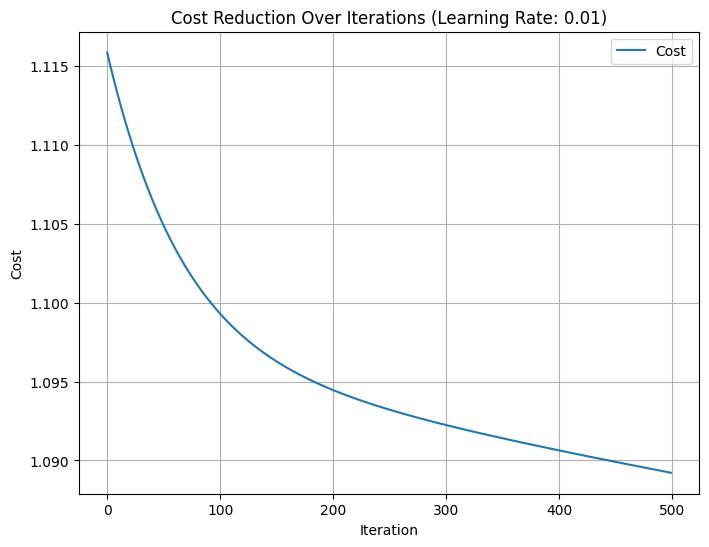

Initial Cost: 1.1158608479596404
Final Cost: 1.0892233754862581


In [118]:
import matplotlib.pyplot as plt

def test_gradient_descent_softmax_with_plot():
    # Generate synthetic data
    np.random.seed(0)
    n, d, c = 100, 5, 3  # 100 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    y_indices = np.random.randint(0, c, size=n)
    y = np.zeros((n, c))
    y[np.arange(n), y_indices] = 1  # One-hot encoding

    # Initialize weights and biases
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Gradient descent parameters
    alpha = 0.01  # Learning rate
    n_iter = 500  # Iterations

    # Run gradient descent
    W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)

    # Plot cost history
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_iter), cost_history, label="Cost")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost Reduction Over Iterations (Learning Rate: {alpha})")
    plt.legend()
    plt.grid()
    plt.show()

    # Display initial and final cost
    print(f"Initial Cost: {cost_history[0]}")
    print(f"Final Cost: {cost_history[-1]}")

# Run the test
test_gradient_descent_softmax_with_plot()

Prediction function:

In [66]:
# Prediction Function
def predict_softmax(X, W, b):
    """
    Predict the class labels for input data.
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    Returns:
    numpy.ndarray: Predicted class labels of shape (n,).
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)

In [67]:
def test_predict_softmax():
    # Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 10, 5, 3 # 10 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    W = np.random.rand(d, c)
    b = np.random.rand(c)
    # Compute the predictions using the function
    predictions = predict_softmax(X, W, b)
    # Check the shape of the output
    assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"
    # Verify that all predicted labels are within the range of class indices
    assert np.all(predictions >= 0) and np.all(predictions < c), (
    f"Predictions out of range: expected 0 to {c-1}, got {predictions}"
    )
    # Check that the predicted labels are integers
    assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.dtype}"
    print("All tests passed for predict_softmax!")

# Run the test
test_predict_softmax()

All tests passed for predict_softmax!


Evaluating classifier:

In [68]:
# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.
    Parameters:
    y_true (numpy.ndarray): True class labels of shape (n,).
    y_pred (numpy.ndarray): Predicted class labels of shape (n,).
    Returns:
    tuple: Confusion matrix, precision, recall, and F1-score.
    """
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1

Now softmax regression for the dataset 'titanic.csv' file

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r"/content/drive/MyDrive/Datasets/Datasets/Titanic-Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
#null value check
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [71]:
#drop columns useless for prediction
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

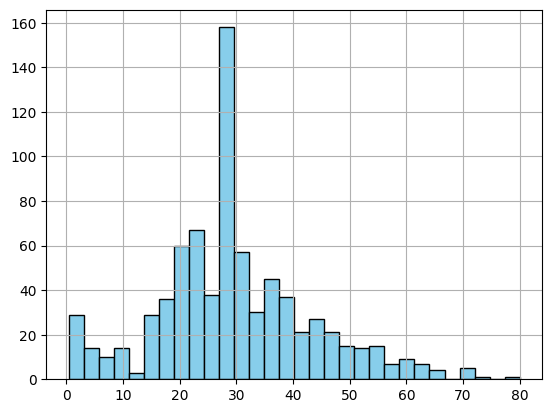

In [119]:
df["Age"].hist(bins=30, color="skyblue", edgecolor="black")
plt.show()

In [73]:
skewness = df["Age"].skew()
print("Skewness:", skewness)
mean = df["Age"].mean()
median = df["Age"].median()
print("Mean:", mean)
print("Median:", median)

Skewness: 0.38910778230082704
Mean: 29.69911764705882
Median: 28.0


In [74]:
# Input missing Age values with the median.
df.fillna(df["Age"].median(), inplace=True)
# Fill missing Embarked values with the mode ("S"), as it's the most common value.
df.fillna(df["Embarked"].mode()[0], inplace=True)


In [75]:
# Categorical variables to numerical values
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [76]:
# New feature "FamilySize"
df.loc[:,"FamilySize"] = df["SibSp"] + df["Parch"] + 1
df.drop(["SibSp", "Parch"], axis=1, inplace=True)

In [77]:
# Finding duplicate rows
int(df.duplicated().sum())

117

In [78]:
# remove duplicate rows
df.drop_duplicates(inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0.0,2
1,1,1,1,38.0,71.2833,1.0,2
2,1,3,1,26.0,7.9250,0.0,1
3,1,1,1,35.0,53.1000,0.0,2
4,0,3,0,35.0,8.0500,0.0,1


In [79]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,2
FamilySize,0


In [81]:
df.fillna(df["Embarked"].mode()[0], inplace=True)
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
FamilySize,0


Train test and standard scaling in dataset:

In [82]:
X = df.drop("Pclass", axis=1).values
y = df["Pclass"].values

In [83]:
# One-hot encode the target variable
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
y_onehot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [84]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y)

Standard scaling

In [87]:
# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Assertions to check the shape of X_train_scaled and X_test_scaled
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), f"X_train_scaled shape mismatch: {X_train_scaled.shape}"
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), f"X_test_scaled shape mismatch: {X_test_scaled.shape}"
print("Shape assertions passed!")

Shape assertions passed!


Initializing parameters and hyperparameters:

In [88]:
# Intitalizations:
num_classes = y_train.shape[1]
num_features = X_train_scaled.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)
alpha = 0.1
n_iter = 1000

Start Training:

In [89]:
print("Training Softmax Regression Model:")
W, b, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True)

Training Softmax Regression Model:
Iteration 0: Cost = 1.070208
Iteration 100: Cost = 0.636439
Iteration 200: Cost = 0.590986
Iteration 300: Cost = 0.568292
Iteration 400: Cost = 0.553687
Iteration 500: Cost = 0.543165
Iteration 600: Cost = 0.535074
Iteration 700: Cost = 0.528580
Iteration 800: Cost = 0.523211
Iteration 900: Cost = 0.518674
Iteration 999: Cost = 0.514815


Observation of cost history

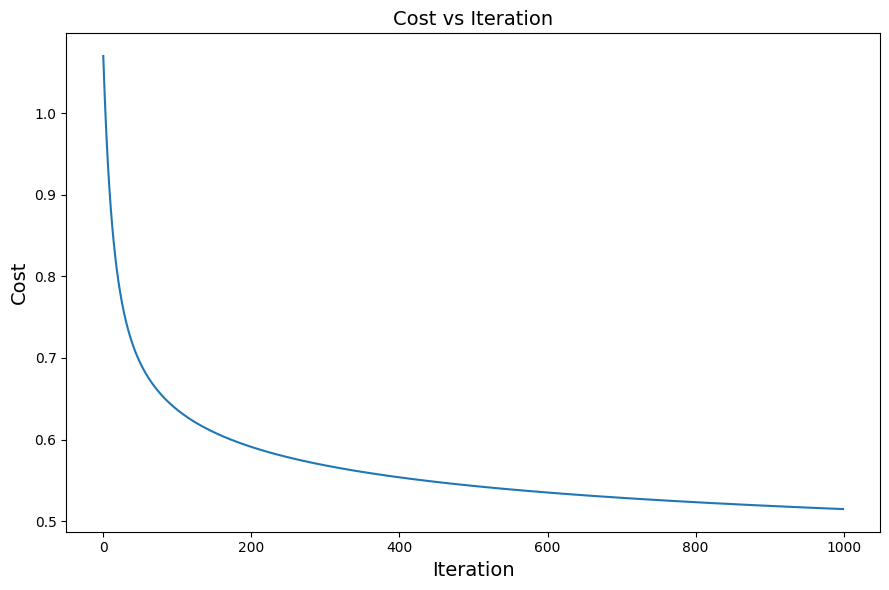

In [90]:
#Plot Cost Vs. Iterations:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()
plt.show()

Model overfit check:

In [91]:
# Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)
# Evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.5148
Test Loss (Cost): 0.5412


In [92]:
# Convert one-hot encoded y_test back to class labels
y_test_labels = np.argmax(y_test, axis=1)

Model accuracy test:

In [95]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test_labels) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")
# Evaluation
y_test_true = np.argmax(y_test, axis=1)
confusion_matrix, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("Confusion Matrix:")
print(confusion_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Test Accuracy: 78.54%
Confusion Matrix:
[[ 52   2   9]
 [  7  16  26]
 [  2   4 115]]
Precision: 0.78
Recall: 0.79
F1-Score: 0.76


Confusion matrix visualization:

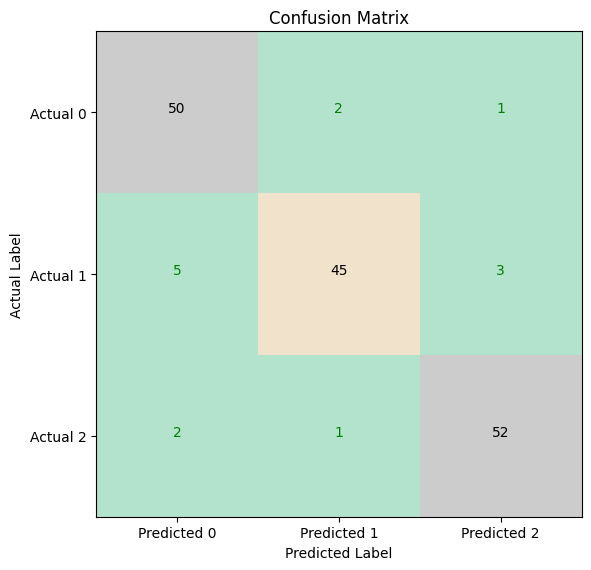

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Example confusion matrix
confusion_matrix = np.array([[50, 2, 1],
                              [5, 45, 3],
                              [2, 1, 52]])

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix, cmap="Pastel2")

# Set tick labels
plt.xticks(range(3), ["Predicted 0", "Predicted 1", "Predicted 2"])
plt.yticks(range(3), ["Actual 0", "Actual 1", "Actual 2"])

# Add text labels inside cells
for i in range(3):
    for j in range(3):
        plt.text(j, i, confusion_matrix[i, j], ha="center",
                 color="black" if confusion_matrix[i, j] > np.max(confusion_matrix) / 2 else "green")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()